In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

El programa debe permitir al usuario ingresar la información necesaria para registrar los resultados del proceso de empaque de la planta por día, validar que no se registre la misma información para una fecha y máquina ya registrada, y calcular la merma.

In [111]:
# Función para calcular la merma
def calcular_merma(empaque_programado, empaque_real):
    return empaque_programado - empaque_real

In [121]:
# Función para el cargado de archivos
def cargar_archivo():
    try:
        df = pd.read_excel('resultados.xlsx')
    except FileNotFoundError:
        df = pd.DataFrame(columns=['Fecha', 'Maquina', 'Producto', 'Tipo Empaque', 'Empaque Programado', 'Empaque Real', 'Merma'])
    
    return df

In [112]:
# Función para solicitar información y validar que no se repita el registro
def registrar_resultados():
    # Leer el archivo excel de resultados previos
    df = cargar_archivo()
    
    # Pedir al usuario la información necesaria
    while True:
        fecha = input('Ingrese la fecha (YYYY-MM-DD): ')
        maquina = input('Ingrese el número de máquina (M1 o M2): ')
        while (maquina not in ['M1', 'M2']):
            maquina = input('Reingrese el número de máquina (M1 o M2)')
        if not df.empty:
            # Validar que no se repita el registro para una fecha y máquina determinadas
            registro_existente = df[(df['Fecha'] == fecha) & (df['Maquina'] == maquina)]
            if not registro_existente.empty:
                print('Ya existe un registro para esa fecha y máquina. Inténtelo de nuevo.')
                continue

        # Mejora del código con bucles si en todo caso el usuario no ingresa el nombre del producto y tipo de empaque correcto.
        producto = input('Ingrese el nombre del producto (Jamón Ingles, Jamón del País, Jamonada, Salchicha Alemana o Chorizo parrillero): ')
        lista_productos = ['Jamón Ingles', 'Jamón del País', 'Jamonada', 'Salchicha Alemana', 'Chorizo parrillero']
        while (producto not in lista_productos):
            producto = input('Reingrese el nombre del producto (Jamón Ingles, Jamón del País, Jamonada, Salchicha Alemana o Chorizo parrillero): ')                        
        
        tipo_empaque = input('Ingrese el tipo de empaque (350 gr, 650 gr o 950 gr): ')
        lista_tipo_empaque = ['350 gr', '650 gr', '950 gr']
        while (tipo_empaque not in lista_tipo_empaque):
            tipo_empaque = input('Reingrese el tipo de empaque (350 gr, 650 gr o 950 gr): ')

        # Si en todo caso el empaque_real es mayor que el empaque_programado
        empaque_programado = int(input('Ingrese el empaque programado: '))
        empaque_real = int(input('Ingrese el empaque real: '))

        while not (empaque_real < empaque_programado):
            empaque_programado = int(input('Reingrese el empaque programado: '))
            empaque_real = int(input('Reingrese el empaque real: '))

        # Calcular la merma
        merma = calcular_merma(empaque_programado, empaque_real)
        
        # Agregar el registro al DataFrame
        registro_df = pd.DataFrame({'Fecha': [fecha], 'Maquina': [maquina], 'Producto': [producto], 'Tipo Empaque': [tipo_empaque], 'Empaque Programado': [empaque_programado], 'Empaque Real': [empaque_real], 'Merma': [merma]})
        df = pd.concat([df,registro_df], ignore_index=True)
        
        # Guardar el DataFrame en el archivo xlsx(Excel)
        df.to_excel('resultados.xlsx', index=False)
                
        break
   

In [126]:
# Función para mostrar en pantalla un listado de toda la información registrada
def mostrar_resultados():
    df = cargar_archivo()
    return df

In [127]:
# Función para mostrar un análisis estadístico descriptivo del proceso de empaque
def mostrar_analisis_estadistico():
    df = cargar_archivo()
    return df.describe()  
    

In [128]:
# Mostrar gráficos para comparar la efectividad de trabajo de las máquinas en el tiempo
def mostrar_graficos_efectividad():
    # Cargar los datos de las máquinas
    df = cargar_archivo()
    
    # Grafico de efectividad de trabajo de las máquinas
    maquinas = df['Maquina'].unique()
    
    for maquina in maquinas:
        datos_maquina = df[df['Maquina'] == maquina]
        plt.plot(datos_maquina['Fecha'], datos_maquina['Empaque Real'], label=maquina)
    plt.legend()
    plt.xlabel('Fecha')
    plt.ylabel('Empaque Real')
    # Mostrar el gráfico
    plt.show()

In [133]:
# Llamado de la función para registrar los resultados
registrar_resultados()

In [134]:
# Llamado de la función para mostrar los resultados
mostrar_resultados()

,Fecha,Maquina,Producto,Tipo Empaque,Empaque Programado,Empaque Real,Merma
0,01/12/2022,M1,Jamón Ingles,350 gr,1000,900,100
1,02/12/2022,M2,Jamonada,650 gr,900,800,100
2,03/12/2022,M2,Salchicha Alemana,950 gr,1900,1800,100
3,04/12/2022,M1,Chorizo parrillero,950 gr,1700,1500,200


In [135]:
# Llamado de la función para el análisis estadístico del proceso de empaque
mostrar_analisis_estadistico()

,Empaque Programado,Empaque Real,Merma
count,4.000000,4.000000,4.0
mean,1375.000000,1250.000000,125.0
std,499.165971,479.583152,50.0
min,900.000000,800.000000,100.0
25%,975.000000,875.000000,100.0
50%,1350.000000,1200.000000,100.0
75%,1750.000000,1575.000000,125.0
max,1900.000000,1800.000000,200.0


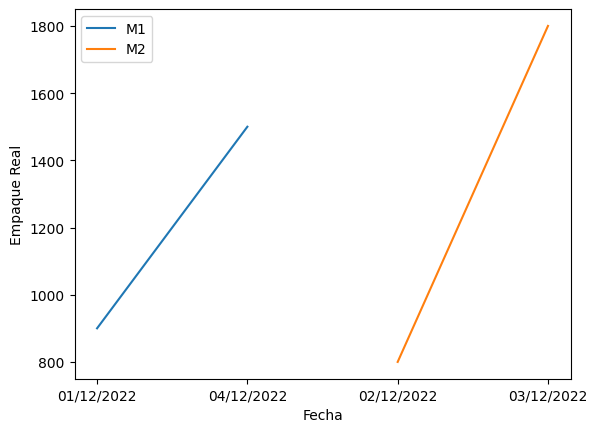

In [136]:
# Llamado de la función para mostrar el gráfico de efectividad
mostrar_graficos_efectividad()